In [54]:
file_path = "Hamshahri-Corpus.txt"

# Open the file using the open() function
with open(file_path, 'r') as file:
    # Read the contents of the file
    lines = file.read().splitlines()
    
print(lines[0])

.DID	1S1


In [61]:
import pandas as pd


data = []
section = {}

for line in lines:
    if line.startswith(".DID"):
        section["DID"] = line.split()[1]
        
    elif line.startswith(".Date"):
        section["Date"] = line.split()[1]
        
    elif line.startswith(".Cat"):
        section["Category"] = line.split()[1]
        
    elif line == "":
        if all(key in section for key in ["DID", "Date", "Category"]):
            data.append(section)

        section = {}
        
    else:
        section.setdefault("Text", []).append(line)

        
df = pd.DataFrame(data)
df

,DID,Date,Category,Text
0,1S1,75\04\02,adabh,"[جاودانگي در زندگي گروهي از طريق هنر , نگاهي ب..."
1,2S1,75\04\02,adabh,"[رويدادهاي هنري جهان , نمايشگاه هنر در خدمت دي..."
2,3S1,75\04\02,adabh,"[برديوار نگارخانه ها , گالري گلستان: , نمايشگا..."
3,4S1,75\04\02,ejtem,"[بازي را جدي بگيريم , مطالعه اي مقدماتي پيرامو..."
4,5S1,75\04\02,elmfa,"[تخته سياه و غباري كه سترده نمي شود... , اشاره..."
...,...,...,...,...
165220,60055S2,81\11\20,vrzsh,"[نماينده فدراسيون جهاني واليبال , از ايران هر..."
165221,60055S3,81\11\20,vrzsh,"[شكست نامداران تكواندودر پيكارهاي برتر ليگ , گ..."
165222,60055S4,81\11\20,vrzsh,"[ورزشگاه بزرگ دانشگاه آزاد در تهران , ساخته مي..."
165223,60055S5,81\11\20,vrzsh,"[رئيس فدراسيون پزشكي انتخاب شد , گروه ورزشي: م..."


In [66]:
df.dropna(inplace=True)

In [68]:
df["Text"] = df.Text.apply(lambda x: ' '.join(x))

In [69]:
date_format = '%y\%m\%d'
df['Date'] = pd.to_datetime(df['Date'], format=date_format, errors='coerce')

df

,DID,Date,Category,Text
0,1S1,1975-04-02,adabh,جاودانگي در زندگي گروهي از طريق هنر نگاهي به ...
1,2S1,1975-04-02,adabh,رويدادهاي هنري جهان نمايشگاه هنر در خدمت ديكت...
2,3S1,1975-04-02,adabh,برديوار نگارخانه ها گالري گلستان: نمايشگاه ط...
3,4S1,1975-04-02,ejtem,بازي را جدي بگيريم مطالعه اي مقدماتي پيرامون ...
4,5S1,1975-04-02,elmfa,تخته سياه و غباري كه سترده نمي شود... اشاره; ...
...,...,...,...,...
165220,60055S2,1981-11-20,vrzsh,نماينده فدراسيون جهاني واليبال از ايران هر ن...
165221,60055S3,1981-11-20,vrzsh,شكست نامداران تكواندودر پيكارهاي برتر ليگ گرو...
165222,60055S4,1981-11-20,vrzsh,ورزشگاه بزرگ دانشگاه آزاد در تهران ساخته مي ش...
165223,60055S5,1981-11-20,vrzsh,رئيس فدراسيون پزشكي انتخاب شد گروه ورزشي: مجم...


In [70]:
df['Category'].unique()

array(['adabh', 'ejtem', 'elmfa', 'eqtes', 'gozar', 'havad', 'kharj',
       'maqal', 'shahr', 'siasi', 'vrzsh', 'gungn', 'axrooz', 'cartoon',
       'nameh', 'telfn', 'mohit', 'gofgu', 'akhar', 'elmif', 'shari',
       'shrst', 'maref', 'donya', 'jjahn', 'zanan', 'ydsht', 'soxan',
       'jvarz', 'norooz', 'sanat', 'abksh', 'bankb', 'aeqts', 'nnaft',
       'santj', 'bazar', 'gards', 'shora', 'Adabh', 'Akhar', 'Eqtes',
       'Gozar', 'Kharj', 'Siasi', 'mskan', 'hamln', 'goftg', 'eqtsj',
       'musical', 'cinama', 'lite', 'media', 'thought', 'gqarn',
       'adarman', 'erteg', 'theatre', 'Aeqts', 'Musical', 'ertebat',
       'Theatre', 'Nnaft', 'artw', 'busiw', 'cinew', 'polig', 'sciew',
       'Sporw', 'cultw', 'Busiw', 'Sciew', 'Cinew', 'infor', 'art',
       'books', 'earth', 'Econo', 'Globa', 'lastp', 'Newsp', 'shahz',
       'socie', 'sport', 'techn', 'women', 'youth', 'Cultw', 'Polig',
       'intep', 'city', 'econo', 'globa', 'newsp', 'scien', 'lifew',
       'sporw', 'econw',

In [71]:
len(df['Category'].unique())

105

In [72]:
!pip install langdetect

Defaulting to user installation because normal site-packages is not writeable


In [73]:
# Save the editted dataframe

df.to_csv('Corpus_dataset.csv')

In [2]:
import pandas as pd

df = pd.read_csv('Corpus_dataset.csv')

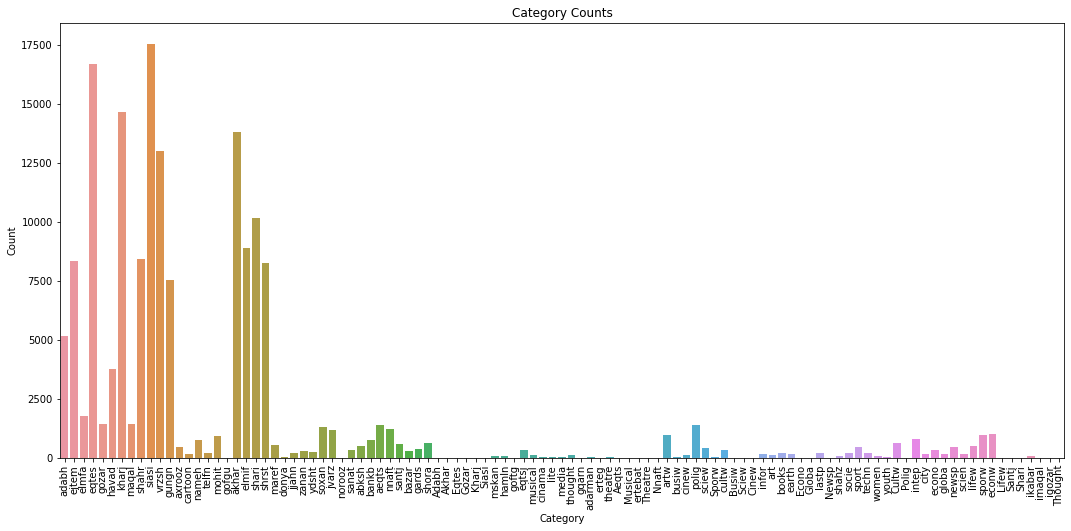

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Bar Plot of Category Counts
plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='Category')
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<Figure size 864x576 with 0 Axes>

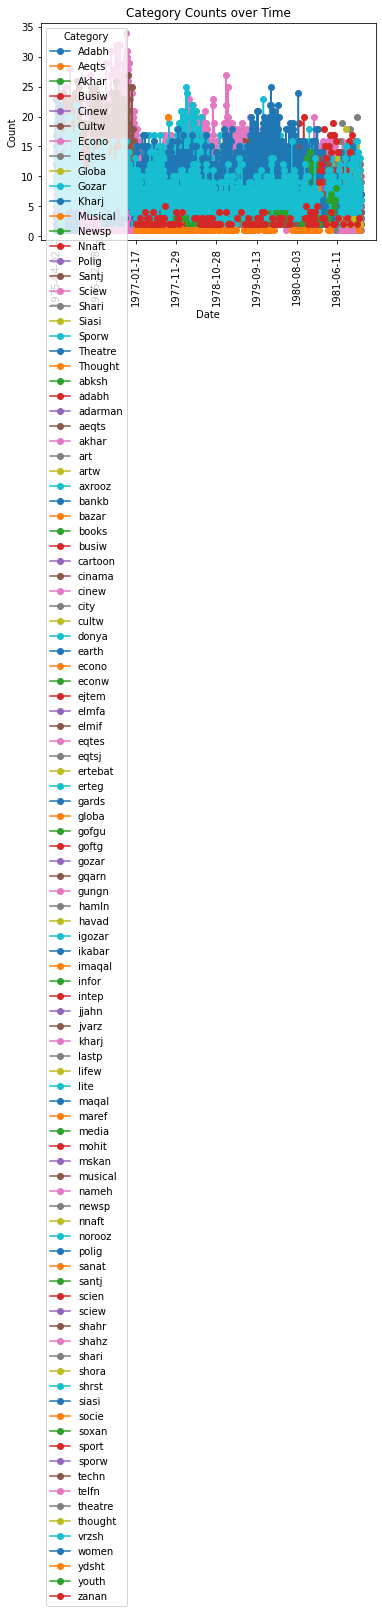

In [76]:
# Plot 2: Time Series Plot of Category Counts over Date
plt.figure(figsize=(12, 8))
df.groupby('Date')['Category'].value_counts().unstack().plot(marker='o')
plt.title('Category Counts over Time')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

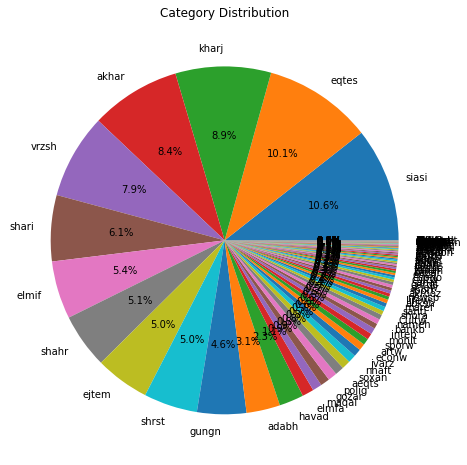

In [77]:
# Pie chart: Proportion of categories
plt.figure(figsize=(12, 8))
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Category Distribution')
plt.ylabel('')
plt.show()

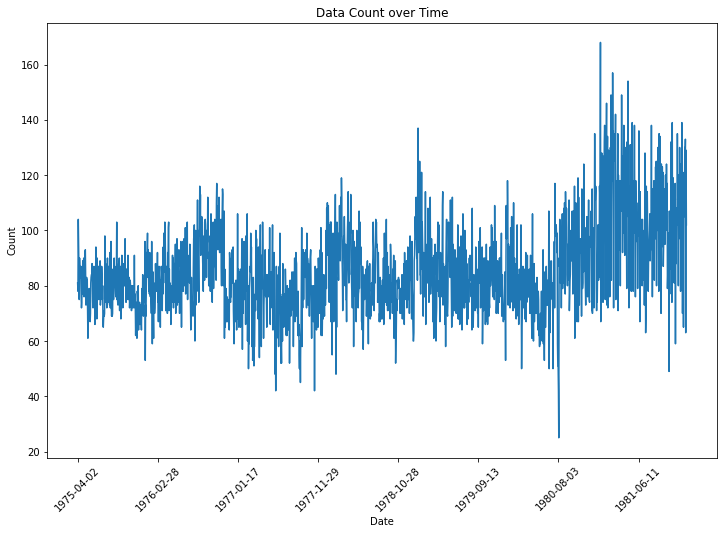

In [78]:
# Line plot: Trends over time
plt.figure(figsize=(12, 8))
df.groupby('Date').size().plot()
plt.title('Data Count over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

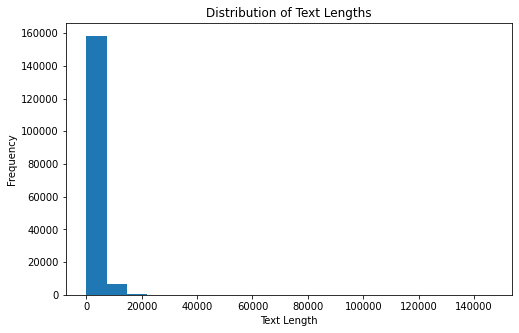

In [79]:
# Histogram: Distribution of Text lengths
plt.figure(figsize=(8, 5))
df['Text'].str.len().plot(kind='hist', bins=20)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Step 4 – Preprocessing

import re
from hazm import *

In [81]:
# lemmatizer = Lemmatizer()
# normalizer = Normalizer()

# def clean_txt(string):
    
#     try:
#         result = re.sub('','',string)          #remove HTML tags
#         result = re.sub('https://.*','',result)   #remove URLs
#         result = re.sub('[0-9a-zA-Z#!?؟:$@%\.,\-()"*+-]', '',result)    #remove non-alphabetic characters 

#         words = normalizer.normalize(result)
#         words = words.split(' ')

#         for i in range(len(words)):
#             words[i] = lemmatizer.lemmatize(words[i])


#         return " ".join(words)
#     except:
#         return None

In [22]:
from hazm import Normalizer, Stemmer, word_tokenize, stopwords_list

normalizer = Normalizer()
lemmatizer = Lemmatizer()

def clean_txt(text):

    text = re.sub('[0-9a-zA-Z#!?؟:$@%\.,\-()"*+-]', '',text)    #remove non-alphabetic characters 
    
    # Normalize and tokenize the text
    normalized_text = normalizer.normalize(text)
    tokens = word_tokenize(normalized_text)

    # Remove stopwords
    stop_words = stopwords_list()
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # lemetize the remaining words
    stemmed_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a single string
    processed_text = " ".join(stemmed_tokens)

    return processed_text

In [12]:
df['Text'] = df['Text'].apply(clean_txt)

In [15]:
df.dropna(inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,Date,Category,Text
0,1975-04-02,adabh,جاودانگی زندگی طریق هنر نگاه نمایشگاه آثار هنر...
1,1975-04-02,adabh,رویداد هنر جهان نمایشگاه هنر خدمت دیکتاتورها ن...
2,1975-04-02,adabh,بردیوار نگارخانه گالری گلستان نمایشگاه طرح ساخ...
3,1975-04-02,ejtem,بازی گرفتگیر مطالعه مقدمات پیرامون نقش بازی زن...
4,1975-04-02,elmfa,تخته سیاه غبار سترده شدشو اشاره; رغم گسترش توس...
...,...,...,...
162782,1981-11-20,vrzsh,نماینده فدراسیون جهانی والیبال ایران شایسته می...
162783,1981-11-20,vrzsh,شکست نامدار تکواندودر پیکار برتر لیگ گروه ورزش...
162784,1981-11-20,vrzsh,ورزشگاه دانشگاه آزاد تهران ساخته شدشو گروه ورز...
162785,1981-11-20,vrzsh,رئیس فدراسیون پزشک انتخاب شدشو گروه ورزش مجمع ...


In [16]:
df.to_csv('Corpus_dataset.csv')

In [17]:
import pandas as pd

df = pd.read_csv('Corpus_dataset.csv')

In [19]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df

,Date,Category,Text
0,1975-04-02,adabh,جاودانگی زندگی طریق هنر نگاه نمایشگاه آثار هنر...
1,1975-04-02,adabh,رویداد هنر جهان نمایشگاه هنر خدمت دیکتاتورها ن...
2,1975-04-02,adabh,بردیوار نگارخانه گالری گلستان نمایشگاه طرح ساخ...
3,1975-04-02,ejtem,بازی گرفتگیر مطالعه مقدمات پیرامون نقش بازی زن...
4,1975-04-02,elmfa,تخته سیاه غبار سترده شدشو اشاره; رغم گسترش توس...
...,...,...,...
162782,1981-11-20,vrzsh,نماینده فدراسیون جهانی والیبال ایران شایسته می...
162783,1981-11-20,vrzsh,شکست نامدار تکواندودر پیکار برتر لیگ گروه ورزش...
162784,1981-11-20,vrzsh,ورزشگاه دانشگاه آزاد تهران ساخته شدشو گروه ورز...
162785,1981-11-20,vrzsh,رئیس فدراسیون پزشک انتخاب شدشو گروه ورزش مجمع ...


In [20]:
# Step 5 - Feature Engineering

from sklearn.feature_extraction.text import TfidfVectorizer

sampled_df = df.sample(10000)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text column
tfidf_matrix = vectorizer.fit_transform(sampled_df['Text'])

# Create a DataFrame to store the TF-IDF values
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Print the TF-IDF values
tfidf_df

,__,___,______ف,____حض,____دبیرک,___تدارکات,___ح,__دبی,__فع,__همی,...,ییتس,ییخاندا,ییزل,ییل,ییلاق,ییلاقات,ییلماز,یین,یینده,یینگ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


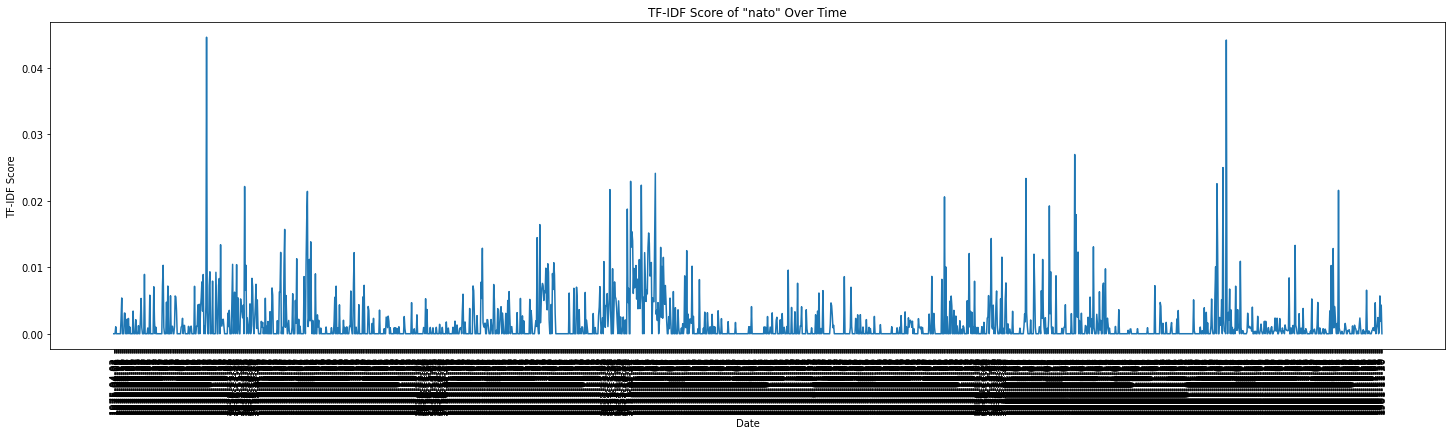

In [4]:
import matplotlib.pyplot as plt

df_grouped = df.groupby('Date')['Text'].apply(' '.join).reset_index()

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_grouped['Text'])

nato_index = tfidf_vectorizer.vocabulary_['ناتو']
tfidf_scores = tfidf_matrix[:, nato_index].toarray().flatten()

plt.figure(figsize=(25, 6))
plt.plot(df_grouped['Date'], tfidf_scores)
plt.xlabel('Date')
plt.ylabel('TF-IDF Score')
plt.title('TF-IDF Score of "nato" Over Time')
plt.xticks(rotation=90)
plt.show()

In [5]:
nato_tfidf_df = pd.DataFrame()
nato_tfidf_df['date'] = df_grouped['Date']
nato_tfidf_df['nato_frequency'] = tfidf_scores

sorted_ = nato_tfidf_df.sort_values(by="nato_frequency", ascending=False)
sorted_

,date,nato_frequency
139,1975-09-22,0.044629
1666,1981-03-18,0.044203
1439,1980-05-22,0.026977
1661,1981-03-11,0.025008
811,1978-03-03,0.024143
...,...,...
869,1978-05-18,0.000000
867,1978-05-16,0.000000
861,1978-05-09,0.000000
859,1978-05-06,0.000000


In [21]:
# Step 6 - Dimensionality Reduction

from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA to the TF-IDF dataframe
pca.fit(tfidf_df)

# Transform the TF-IDF dataframe to 2 dimensions
tfidf_reduced = pca.transform(tfidf_df)

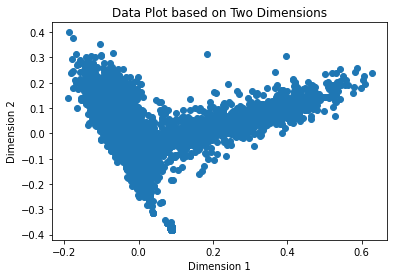

In [23]:
import matplotlib.pyplot as plt

# Extract the x and y coordinates from the reduced data
x = tfidf_reduced[:, 0]
y = tfidf_reduced[:, 1]

# Plot the data points
plt.scatter(x, y)

# Add labels and title to the plot
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data Plot based on Two Dimensions')

# Show the plot
plt.show()

In [24]:
# Step 7 - Clustering

len(df['Category'].unique())

104

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

categories = df['Category'].values

encoder = LabelEncoder()
categories = encoder.fit_transform(categories)

In [26]:
tfidf_reduced

array([[-0.02880561, -0.01144611],
       [ 0.33549097,  0.11557213],
       [ 0.41794883,  0.15902632],
       ...,
       [-0.03477988, -0.01602252],
       [-0.00686508,  0.00465915],
       [-0.04500653, -0.00977208]])

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=104, random_state=0, n_init="auto").fit(tfidf_reduced)

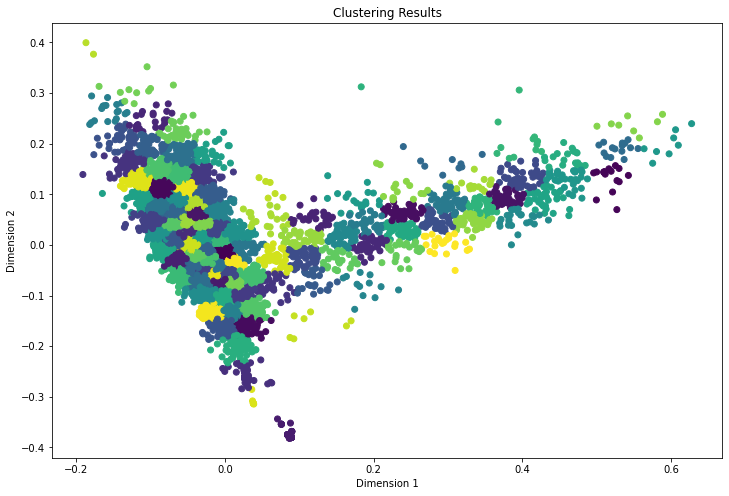

In [28]:
# Create a scatter plot to visualize the clustering results
plt.figure(figsize=(12, 8))
plt.scatter(tfidf_reduced[:, 0], tfidf_reduced[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clustering Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [29]:
# Step 8 - Storage

# Initialize PCA with 5 components
pca = PCA(n_components=5)

# Fit PCA to the TF-IDF dataframe
pca.fit(tfidf_df)

# Transform the TF-IDF dataframe to 5 dimensions
tfidf_reduced_5 = pca.transform(tfidf_df)

In [30]:
kmeans = KMeans(n_clusters=104, random_state=0, n_init="auto").fit(tfidf_reduced_5)

kmeans.labels_

array([91, 14,  2, ..., 97,  6, 56], dtype=int32)

In [31]:
import pickle

# Specify the file path to save the labels
labels_file_path = 'kmeans_labels.pkl'

# Save the labels using pickle
with open(labels_file_path, 'wb') as file:
    pickle.dump(kmeans.labels_, file)

print("Labels saved successfully!")

Labels saved successfully!


In [32]:
import joblib

# Save the KMeans model
filename = 'kmeans_model.sav'
joblib.dump(kmeans, filename)

['kmeans_model.sav']

In [33]:
# A test before starting step 9

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

texts = sampled_df['Text'].values
categories = sampled_df['Category'].values
# texts = tfidf_reduced_5

encoder = LabelEncoder()
categories = encoder.fit_transform(categories)

In [34]:
print(categories[categories<0])
t = tfidf_reduced_5
print(t[t<0])

[]
[-0.02881679 -0.01153229 -0.09429911 ... -0.00987258 -0.02065918
 -0.05506345]


In [35]:
X_train,X_test,Y_train, Y_test = train_test_split(texts, categories, test_size=0.25, random_state=30)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer= TfidfVectorizer()

tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

In [37]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0)

In [38]:
clf.fit(tf_x_train,Y_train)
# clf.fit(X_train, Y_train)

LinearSVC(random_state=0)

In [39]:
y_test_pred = clf.predict(tf_x_test)
# y_test_pred = clf.predict(X_test)

In [40]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         7
           8       0.52      0.65      0.58        72
           9       0.14      0.06      0.09        16
          10       0.61      0.64      0.63       232
          11       0.00      0.00      0.00         1
          12       0.50      0.14      0.22         7
          13       1.00      1.00      1.00         6
          14       1.00      0.17      0.29        12
          15       0.00      0.00      0.00         4
          16       1.00      0.33      0.50         3
          17       0.00      0.00      0.00         3
          18       1.00      1.00      1.00         5
          19       0.00      0.00      0.00         1
          20       0.00    

/home/elahe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/elahe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/elahe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/elahe/.local/lib/python3.8/site-packages/skle

In [41]:
# Step 9 - Classification (Model Building)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [42]:
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = MultinomialNB()
rf = RandomForestClassifier()

ensemble_model = VotingClassifier(estimators=[('knn', knn), ('logreg', logreg), ('nb', nb), ('rf', rf)], voting='hard')

In [43]:
ensemble_model.fit(tf_x_train,Y_train)
# ensemble_model.fit(X_train,Y_train)

/home/elahe/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('logreg', LogisticRegression()),
                             ('nb', MultinomialNB()),
                             ('rf', RandomForestClassifier())])

In [44]:
predictions = ensemble_model.predict(tf_x_test)

In [45]:
report = classification_report(Y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.09      0.15        11
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.33      0.14      0.20         7
           8       0.47      0.60      0.52        72
           9       0.33      0.06      0.11        16
          10       0.49      0.75      0.59       232
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         7
          13       1.00      1.00      1.00         6
          14       0.00      0.00      0.00        12
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         3
          18       1.00      0.80      0.89         5
          19       0.00    

/home/elahe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/elahe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/elahe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/elahe/.local/lib/python3.8/site-packages/skle

In [46]:
knn.fit(tf_x_train,Y_train)
logreg.fit(tf_x_train,Y_train)
nb.fit(tf_x_train,Y_train)
rf.fit(tf_x_train,Y_train)

/home/elahe/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [47]:
knn_predictions = knn.predict(tf_x_test)
logreg_predictions = logreg.predict(tf_x_test)
nb_predictions = nb.predict(tf_x_test)
rf_predictions = rf.predict(tf_x_test)

In [48]:
report = classification_report(Y_test, knn_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.27      0.37        11
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.09      0.14      0.11         7
           8       0.37      0.72      0.49        72
           9       0.11      0.25      0.16        16
          10       0.56      0.50      0.53       232
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         7
          13       0.60      1.00      0.75         6
          14       0.17      0.08      0.11        12
          15       0.00      0.00      0.00         4
          16       0.33      0.33      0.33         3
          17       0.00      0.00      0.00         3
          18       1.00      0.80      0.89         5
          19       0.00    

/home/elahe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/elahe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/elahe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/elahe/.local/lib/python3.8/site-packages/skle

In [49]:
report = classification_report(Y_test, logreg_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         7
           8       0.54      0.58      0.56        72
           9       0.00      0.00      0.00        16
          10       0.53      0.73      0.61       232
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         7
          13       1.00      0.50      0.67         6
          14       0.00      0.00      0.00        12
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         1
          20       0.00    

/home/elahe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/elahe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/elahe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
report = classification_report(Y_test, nb_predictions)
print(report)

/home/elahe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/elahe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        72
           9       0.00      0.00      0.00        16
          10       0.44      0.69      0.54       232
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00        12
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         1
          20       0.00    

/home/elahe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
report = classification_report(Y_test, rf_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         7
           8       0.46      0.49      0.47        72
           9       0.00      0.00      0.00        16
          10       0.57      0.68      0.62       232
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         7
          13       1.00      0.83      0.91         6
          14       0.00      0.00      0.00        12
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         3
          18       1.00      1.00      1.00         5
          19       0.00      0.00      0.00         1
          20       0.00    

/home/elahe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/elahe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/elahe/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
from sklearn.metrics import accuracy_score

print('knn accuracy on test:', accuracy_score(Y_test, knn_predictions))
print('knn accuracy on train:', accuracy_score(Y_train, knn.predict(tf_x_train)))

print('logreg accuracy on test:', accuracy_score(Y_test, logreg_predictions))
print('logreg accuracy on train:', accuracy_score(Y_train, logreg.predict(tf_x_train)))

print('nb accuracy on test:', accuracy_score(Y_test, nb_predictions))
print('nb accuracy on train:', accuracy_score(Y_train, nb.predict(tf_x_train)))

print('rf accuracy on test:', accuracy_score(Y_test, rf_predictions))
print('rf accuracy on train:', accuracy_score(Y_train, rf.predict(tf_x_train)))

print('ensemble_model accuracy on test:', accuracy_score(Y_test, predictions))
print('ensemble_model accuracy on train:', accuracy_score(Y_train, ensemble_model.predict(tf_x_train)))

knn accuracy on test: 0.5392
knn accuracy on train: 0.6561333333333333
logreg accuracy on test: 0.6296
logreg accuracy on train: 0.7405333333333334
nb accuracy on test: 0.4496
nb accuracy on train: 0.48973333333333335
rf accuracy on test: 0.618
rf accuracy on train: 0.9997333333333334
ensemble_model accuracy on test: 0.6148
ensemble_model accuracy on train: 0.7913333333333333


In [53]:
from sklearn.metrics import confusion_matrix

print('knn confusion_matrix on test:', confusion_matrix(Y_test, knn_predictions))

print('logreg confusion_matrix on test:', confusion_matrix(Y_test, logreg_predictions))

print('nb confusion_matrix on test:', confusion_matrix(Y_test, nb_predictions))

print('rf confusion_matrix on test:', confusion_matrix(Y_test, rf_predictions))

print('ensemble_model confusion_matrix on test:', confusion_matrix(Y_test, predictions))

knn confusion_matrix on test: [[3 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
logreg confusion_matrix on test: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
nb confusion_matrix on test: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
rf confusion_matrix on test: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
ensemble_model confusion_matrix on test: [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [54]:
from sklearn.naive_bayes import GaussianNB

knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()
rf = RandomForestClassifier()

ensemble_model = VotingClassifier(estimators=[('knn', knn), ('logreg', logreg), ('nb', nb), ('rf', rf)])

In [57]:
tfidf_reduced_5

array([[-2.88167943e-02, -1.15322933e-02, -9.42991088e-02,
        -1.80217236e-03,  5.47749310e-02],
       [ 3.35505003e-01,  1.15615004e-01, -1.07490602e-02,
         1.75897190e-02,  4.36679459e-02],
       [ 4.17944951e-01,  1.59057297e-01, -8.99233847e-03,
        -6.07958060e-02,  2.68578718e-02],
       ...,
       [-3.47464385e-02, -1.59440921e-02,  3.15424294e-01,
         8.34043018e-05,  2.34029437e-02],
       [-6.76968886e-03,  4.75234231e-03,  4.64924873e-01,
         5.63013692e-02,  2.33195907e-02],
       [-4.49827339e-02, -9.87258342e-03, -2.06591850e-02,
        -5.50634499e-02,  8.13464134e-02]])

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(tfidf_reduced_5, categories, test_size=0.25, random_state=42)

ensemble_model.fit(X_train,Y_train)
predictions = ensemble_model.predict(X_test)

print('ensemble_model accuracy on test:', accuracy_score(Y_test, predictions))
print('ensemble_model accuracy on train:', accuracy_score(Y_train, ensemble_model.predict(X_train)))

/home/elahe/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ensemble_model accuracy on test: 0.4696
ensemble_model accuracy on train: 0.6457333333333334


In [56]:
print('ensemble_model confusion_matrix on test:', confusion_matrix(Y_test, predictions))

ensemble_model confusion_matrix on test: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('Corpus_dataset.csv')

head_df = df.head(10000)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text column
tfidf_matrix = vectorizer.fit_transform(head_df['Text'])

# Create a DataFrame to store the TF-IDF values
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Print the TF-IDF values
tfidf_df

,ءاما,ءای,ءدندانپزشکی,ءمورد,ءناشناخته,ءناکامل,ءنفت,ءیا,آآرآرت,آئرودینامیک,...,یگوویچ,یگی,یی,ییل,ییلاق,ییلاقات,ییلن,ییمه,ییمو,یینگی
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from sklearn.decomposition import PCA

# Initialize PCA with 5 components
pca = PCA(n_components=5)

# Fit PCA to the TF-IDF dataframe
pca.fit(tfidf_df)

# Transform the TF-IDF dataframe to 5 dimensions
tfidf_reduced_5 = pca.transform(tfidf_df)

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

categories = head_df['Category'].values

encoder = LabelEncoder()
categories = encoder.fit_transform(categories)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()
rf = RandomForestClassifier()

ensemble_model = VotingClassifier(estimators=[('knn', knn), ('logreg', logreg), ('nb', nb), ('rf', rf)], voting='hard')

In [14]:
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(tfidf_reduced_5, categories, test_size=0.25, random_state=42)

ensemble_model.fit(X_train,Y_train)
predictions = ensemble_model.predict(X_test)

print('ensemble_model accuracy on test:', accuracy_score(Y_test, predictions))
print('ensemble_model accuracy on train:', accuracy_score(Y_train, ensemble_model.predict(X_train)))

/home/elahe/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ensemble_model accuracy on test: 0.6404
ensemble_model accuracy on train: 0.7776


In [29]:
# Step 13 - API (Extra Credit)

def predict_category(input_text):
    
    # Pre-process the new text
    preprocessed_text = clean_txt(input_text)

    # Compute TF-IDF vector for the new text
    tfidf_vector = vectorizer.transform([preprocessed_text])
    tfidf_reduced_5 = pca.transform(tfidf_vector.toarray())

    # Predict the category using the trained model
    category = ensemble_model.predict(tfidf_reduced_5)

    return encoder.inverse_transform(category)

In [32]:
predict_category(df['Text'].iloc[0])

/home/elahe/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array(['adabh'], dtype=object)

In [33]:
df['Category'].iloc[0]

'adabh'